<h1>Machine Learning A to Z with KNN</h1>

# import

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification, load_iris, load_breast_cancer, load_digits
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score, classification_report,precision_score, recall_score
from sklearn.metrics import auc, roc_curve, roc_auc_score
from sklearn.model_selection import  train_test_split, KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import  cross_val_score, cross_validate
from sklearn.pipeline import Pipeline

ModuleNotFoundError: No module named 'seaborn'

# scikit-learn
* https://scikit-learn.org
* 파이썬으로 구현한 가장 유명한 ML  라이브러리
* 2007년 Google Summer Code 에서 처음 구현
* 설치 : pip install scikit-learn
* 통일된 인터페이스로 일관성 있는 사용성 제공
  * Estimator
    * fit()
    * predict()
  * Preprocessor
    * fit()
    * transform()
* 다양한 머신러닝 알고리즘 구현
* 모델 선택 : 그리드 서치, 교차 검증, 메트릭스
* 다양한 머신러닝 관련 기능
* 정제된 데이터 세트 제공


# Estimator Interface
* `sklearn.base.BaseEstimator()` :
  * 모델의 기반 클래스모든 머신러닝 모델(Estimator)은 반드시 상속 구현
  * 학습/훈련, 예측 , 평가/검정 방법 인터페이스 일관성 제공
  * 구현 클래스는 개별 알고리즘으로 구현 제공
  * `set_params(**params)`
  * `get_params(deep=True)`
  * `fit(X, y)`
    * 모델 학습/훈련
  * `y_pred = predict(X)`
    * 예측 값 반환
  * `y_pred = fit_predict(X, y)`
    * 학습과 예측을 한 번에 수행
  * `score(X, y)`
    *성능 측정



# k-NN(k-Nearest Neighbors)
* k-최근접 이웃 분류 알고리즘, 지도학습, 가장 간단한 머신러닝 알고리즘
* 기하학적 거리를 이용한 분류기
* 가장 가깝게 위치하는 멤버로 분류, 거리가 동일한 경우 먼저 발견된 이웃으로 판단
* `sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights, ...)`
  * `n_neighbors=5` : 분류에 사용할 가장 가까운 이웃의 갯수
  * `weights= {'uniform', 'distance'}` : 가중치
    * `'uniform'` : 기본 값, 모든 이웃에 대해 동일한 가중치 적용
    * `'distance'` : 거리에 비례한 가중치
  * `fit(X_train, y_train)` : 모델 학습
  * `y_pred = predict(X_test)` : 분류 예측
  * `proba = predict_proba(X_test)` : 확률 예측
  * `dist, idx = knn.kneighbors(X_test)`
    * `dist` : X_train 와 가까운 이웃 요소의 거리
    * `idx` : X_train 와 가까운 이웃 요소의 인덱스

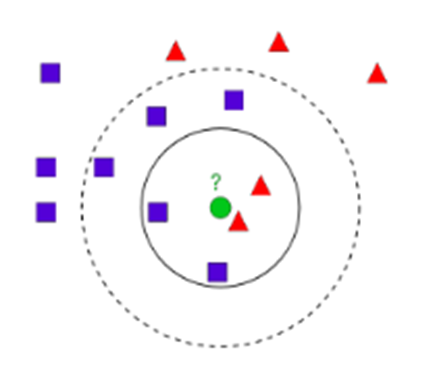


# 거리 계산
  * k-최근접 이웃을 구하기 위한 거리 계산
  * Norm
  * $𝐿_𝑝$ Norm
    * $𝐿_𝑝=(∑|𝑥|^𝑝)^(1/𝑝)$
  * $𝐿_2$ Norm
    * $𝐿_2= \sqrt{(∑𝑥^2)}=\sqrt{𝑥_1^2+𝑥_2^2+⋯+𝑛^2}$
  * 유클리드 거리(Euclidean Distance)
    * n개의 특성을 가진 두 데이터 $p$와 $q$의 차이(거리) 에 대한 $𝐿_2$  Norm
    * $𝑑𝑖𝑠𝑡(𝑝,𝑞)= \sqrt{(𝑝_1−𝑞_1 )^2+…+(𝑝_n−𝑞_n )^2 }$




# 거리 계산 예시
* $𝑑𝑖𝑠𝑡(𝑝_0,𝑞)= \sqrt{(5.1−4.9)^2+(3.5−3.0)^2+(1.4−1.4)^2+(0.2−0.2)^2 }=0.538156$
* $𝑑𝑖𝑠𝑡(𝑝_1,𝑞)= \sqrt{(7.0−4.9)^2+(3.2−3.0)^2+(4.7−1.4)^2+(1.4−0.2)^2}=4.096339$
* $𝑑𝑖𝑠𝑡(𝑝_2,𝑞)= \sqrt{(6.3−4.9)^2+(3.3−3.0)^2+(6.0−1.4)^2+(2.5−0.2)^2 }=5.338539$

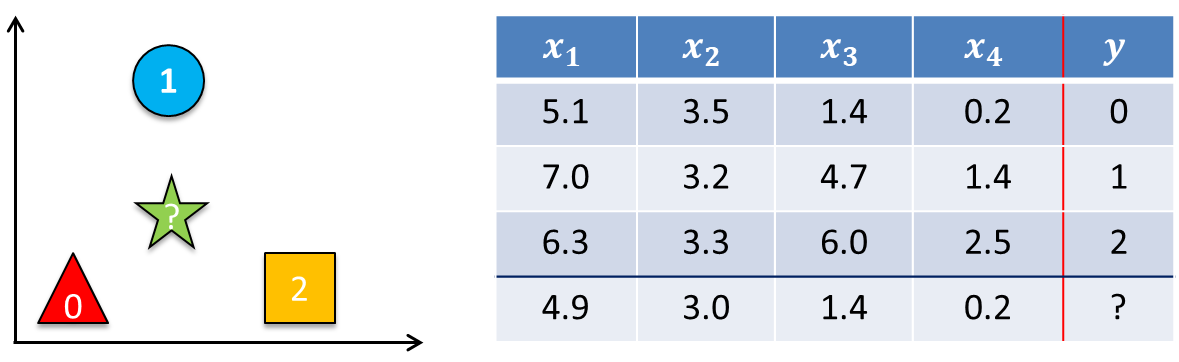


# KNN 무작위수 분류

## `np.random.uniform()`
* 무작위수 25x2 배열 두 그룹(-1~0, 0~1) 생성
  * `np.random.nuniform()`
* 무작위수를 kNN으로 학습
* 새로운 무작위 수  1x2 생성하여 분류


prediction: [1.]


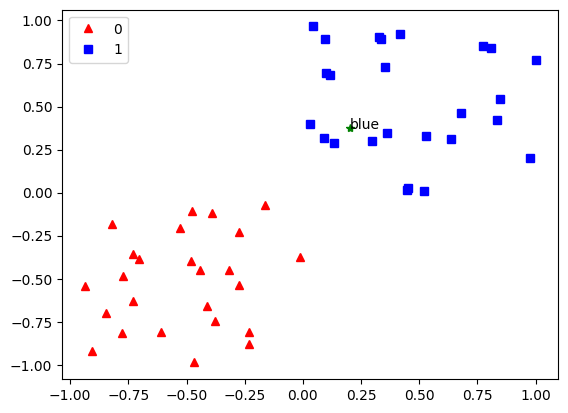

In [ ]:
import sklearn
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(777)
red = np.random.uniform(-1, 0, (25, 2))
blue = np.random.uniform(0, 1, (25, 2))
X = np.vstack((red, blue)) # train data
y = np.zeros(50)
y[25:] = 1 # 0:red, 1:blue

X, y = sklearn.utils.shuffle(X, y, random_state=0) # 무작위 섞기
plt.plot(X[y==0,0], X[y==0,1], 'r^', label='0') # 빨강색 삼각형, y==0
plt.plot(X[y==1,0], X[y==1,1], 'bs', label='1') # 파랑색 사각형, y==1
plt.legend()

newb = np.random.randn(1,2) # test data
plt.plot(newb[:,0], newb[:,1], 'g*') # 초록색 별

model = KNeighborsClassifier()
model.fit(X, y)
y_pred = model.predict(newb)

print("prediction:", y_pred)
plt.annotate('red' if y_pred==0 else 'blue', xy=newb[0])
plt.show()

# Scikit-learn DataSet : sklearn.datasets
* make_XXX()  : 가상 데이타
  * 필요에 따라 랜덤한 숫자로 원하는 분포의 가상 데이타 생성
  * make_moons() : 태극 문양 분포의 데이타 생성
  * make_blobs() : 군집을 위한 테이터 무작위 생성
  * make_classification() : 분류를 위한 데이터 생성
* load_XXX()  : 이미 설치된 데이타
  * load_boston() : 보스턴 지역 주택가격, 회귀 용도
  * load_breast_cancer() : 위스콘신 유방암 데이터, 악성/음성 레이블, 분류 용도
  * load_diabetes() : 당뇨병 환자 데이터, 회귀 용도
  * load_digits() : 손글씨 숫자(0~9) 데이타 셋, 분류 용도
  * load_iris() : 붓꽃 품종 데이타, 분류 용도
  * load_linnerud() : 피트니스 클럽 20명 중년 남성 생리학 변수, 회귀용도
* fetch_XXX()  : 대규모 데이타 다운로드
  * fetch_mldata() : mldata.org 에서 다운로드
    * 예) mnist : fetch_mldata('MNIST original')
  * fetch_openml() : openml.org에서 다운로드
  * fetch_20newsgroups() : 20개의 뉴스 그룹 데이터
  * fetch_olivetti_faces() : 얼굴 이미지 데이터
  * fetch_rcv1() : 로이터 뉴스 말뭉치


##  `make_classification()`

> 들여쓴 블록


* make_classification() : 분류 모델에 적합한 임의의 데이터 생성 함수
  * n_samples=100 : 표본 데이터 수(건수)
  * n_features=20 : 독립 변수의 수(X 갯수)
  * n_informative=2 : 독립 변수 중 종속 변수와 상관관계가 있는 성분 수
  * n_redundant=2 : 독립 변수 중 다른 독립 변수의 선형 조합으로 나타나는 성분의 수
  * n_repeated=0 : 독립 변수 중 단순 중복된 성분의 수
  * n_classes=2 : 종속 변수의 클래스 수
  * n_clusters_per_class=2: 클래스 당 클러스터의 수
  * weights=None : 클래스 당 표본 수 비율, 예) (0.3, 0.7)
  * flip_y=0.01 : 클래스가 임의로 교환되는 샘플의 비율, 노이즈 생성
  * random_state : random seed

* sklean의 make_classficiation()함수로 변경해서 실습
* `X, y = make_classification(n_samples=50, n_features=2,n_classes=2,  n_redundant=0, random_state=0)`

X.shape:(50, 2), y.shape:(50,)
y_classes: [0 1]
prediction: [0]


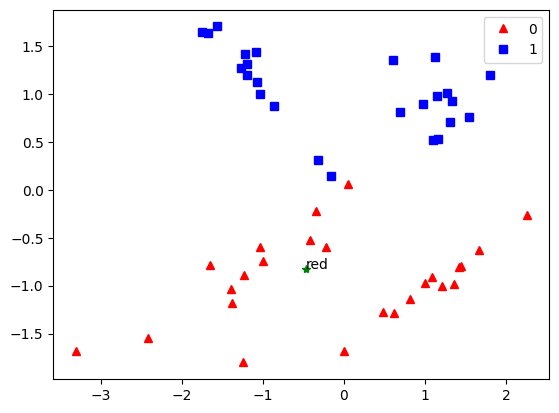

In [ ]:
from sklearn.datasets import make_classification

np.random.seed(777)
X, y = make_classification(n_samples=50, n_features=2,
                           n_classes=2, n_redundant=0,
                           random_state=0)
print(f'X.shape:{X.shape}, y.shape:{y.shape}')
print(f'y_classes: {np.unique(y)}')
plt.plot(X[y==0,0], X[y==0,1], 'r^', label='0')
plt.plot(X[y==1,0], X[y==1,1], 'bs', label='1')
plt.legend()

newb = np.random.randn(1,2)
plt.plot(newb[:,0],newb[:,1], 'g*')

model = KNeighborsClassifier()
model.fit(X, y)
y_pred = model.predict(newb)

print("prediction:", y_pred)
plt.annotate('red' if y_pred==0 else 'blue', xy=newb[0])
plt.show()

# Iris 품종 분류


## Iris Raw Data, CSV
* 4가지 특징으로 붓꽃 품종 구분
  * 4가지 특징 : 꽃잎(petal)과 꽃 받침(sepal)의 폭(width)과 길이(length)
  * 품종 : setosa, versicolor, virginica
* 데이터 구하기
  * seaborn.load_dataset('iris')
  * https://github.com/mwaskom/seaborn-data
https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv


In [ ]:
# 강사가 파일을 제공한 경우 실행하지 마세요.
from urllib import request

file_iris = 'iris.csv'
url_iris = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'

with request.urlopen(url_iris) as r:
  with open(file_iris, 'wb') as f:
    f.write(r.read())

In [ ]:
iris = pd.read_csv('iris.csv')
print(iris.shape)
iris[::20]

(150, 5)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
20,5.4,3.4,1.7,0.2,setosa
40,5.0,3.5,1.3,0.3,setosa
60,5.0,2.0,3.5,1.0,versicolor
80,5.5,2.4,3.8,1.1,versicolor
100,6.3,3.3,6.0,2.5,virginica
120,6.9,3.2,5.7,2.3,virginica
140,6.7,3.1,5.6,2.4,virginica


# Data Preprocessing
* 데이터가 머신 러닝에 적합한 형태가 되게 하는 작업
* Data Encoding
  * 문자형(character), 범주형(Categorical) 데이터를 숫자로 변형
  * Label encoding, Indexing
  * One-hot encoding, Vectorizing
* Scaling
  * 표준화(Standardization)
  *정규화(Normalization)


# Preprocessor Interface
* `sklearn.base.TransformerMixin()` :
  * 데이터 전처리기 기반 클래스
  * `fit(X [,y])`
    * 데이타 전처리 연산
  * `transform(X [,y])`
    * 데이터 전처리 변환
  * `fit_transform(X [,y])`
    * 데이터 전처리 연산 및 변환 동시에 수행



# LabelEncoding
* 문자형, 범주형 데이터를 숫자형 코드로 변형
* `sklearn.preprocessing.LabelEncoder`
  * `fit(label)` : encoding을 위한 class 계산
  * `code=transform(label)` : encoding 실행
  * `code=fit_transfrom(label)` : 계산과 실행을 동시에 작업
  * `label=inverse_transform(code)`: 코드를 범주 데이터로 decoding
  * `classes_` : label의 유일값, encoding 순서(index)


* LabelEncoder 선행 실습

In [ ]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
enc.fit(["cat", "cat", "dog", "cow", "dog"])
print(enc.classes_)
label = enc.transform(["dog", "dog", "cat"])
print(label)
print(enc.inverse_transform([2, 2, 1]))


['cat' 'cow' 'dog']
[2 2 0]
['dog' 'dog' 'cow']


### Iris Dataset Label Encoding
* 품종 데이터 Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
enc.fit(iris['species'])
print('classes:', enc.classes_)
iris['target'] = enc.transform(iris['species'])
iris[::20]

classes: ['setosa' 'versicolor' 'virginica']


,sepal_length,sepal_width,petal_length,petal_width,species,target
0,5.1,3.5,1.4,0.2,setosa,0
20,5.4,3.4,1.7,0.2,setosa,0
40,5.0,3.5,1.3,0.3,setosa,0
60,5.0,2.0,3.5,1.0,versicolor,1
80,5.5,2.4,3.8,1.1,versicolor,1
100,6.3,3.3,6.0,2.5,virginica,2
120,6.9,3.2,5.7,2.3,virginica,2
140,6.7,3.1,5.6,2.4,virginica,2


# 데이타 분할
* `sklearn.model_selection`
* `X_train, X_test, y_train, y_test = train_test_split(X, y, ...)`
  * 같은 크기의 배열 2개를 지정된 비율로 나눠서 반환
  * X, y : 전체 Data set
  * `test_size=0.25 `
    * float(0.0 ~ 1.0): test dataset 비율
    * int : test dataset 갯수
  * `train_size=None` : train dataset 비율 또는 갯수
  * `random_state=None` : 정수, 난수 발생 seed
  * `shuffle=True` : 분할 전 데이터 무작위 섞기 여부
  * `stratify=None` : 층화 추출(데이터 분포 비율) 기준 컬럼

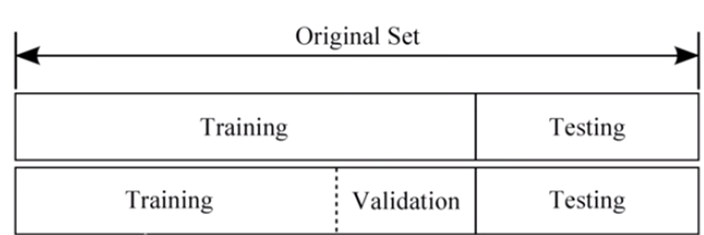

* 데이터 분할 선행 실습

In [ ]:
from sklearn.model_selection import  train_test_split

X = np.arange(10)
y = X * X
print('X:', X, 'y:', y)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)
print("X_train", X_train)
print("y_train", y_train)
print("X_test", X_test)
print("y_test", y_test)

X: [0 1 2 3 4 5 6 7 8 9] y: [ 0  1  4  9 16 25 36 49 64 81]
X_train [4 9 1 6 7 3 0 5]
y_train [16 81  1 36 49  9  0 25]
X_test [2 8]
y_test [ 4 64]


## Iris Raw Data 데이터 분할 후 분류 실습

In [ ]:
from sklearn.model_selection import  train_test_split

feature_names = ['sepal_length','sepal_width','petal_length','petal_width']
X_train, X_test, y_train, y_test = train_test_split(iris[feature_names],
                                                    iris['target'],
                                                    random_state=0)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = np.sum(y_test == y_pred) / y_test.shape[0]

print(f'accuracy:{accuracy}')

accuracy:0.9736842105263158


# scikit-learn Dataset


## sklearn 제공 정제 데이타 : load_XXX()
* `load_boston()` : 보스턴 지역 주택가격, 회귀 용도
* `load_breast_cancer()` : 위스콘신 유방암, 2진 분류 용도
* `load_diabetes()` : 당뇨병 환자 데이터, 회귀 용도
* `load_digits()` : 손글씨 숫자(0~9) 데이타 셋, 다중 분류 용도
* `load_iris()` : 붓꽃 품종 데이터, 다중 분류 용도
* `load_linnerud()` : 피트니스 클럽 중년 남성 20명 생리학 변수, 회귀 용도


## sklearn.utils.Bunch : 샘플 데이터 보관하는 자료구조
* key-value 쌍, 파이썬 딕셔너리와 유사한 구조
* keys() : 키 목록 반환
* 공통 key
  * 'data' : 샘플 데이타, NumPy 배열
  * 'target' : 레이블 데이타, NumPy 배열
  * 'target_names' : 레이블 클래스 이름과 의미
  * 'feature_names' : 샘플 데이타 특성 이름, 컬럼 이름
  * 'DESCR' : 데이타 셋에 대한 전체 설명
  * 'filename' : 데이타 저장 파일 위치, csv
* 데이터 접근
  * obj['key'] 또는 obj.key


## Iris(붓꽃) 데이터
* sklearn.datasets.load_iris()
* 4가지 특징으로 품종 구분
  * 4가지 특징 : 꽃잎(petal)과 꽃 받침(sepal)의 폭(width)과 길이(length)
  * 품종 : setosa, versicolor, virginica


In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()

* type()

In [ ]:
print(type(iris))

<class 'sklearn.utils._bunch.Bunch'>


* keys()

In [ ]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

* DESCR

In [ ]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

* data

In [ ]:
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

* data.shape

In [ ]:
iris.data.shape

(150, 4)

* feature_names

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

* target

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

* target.shape

In [ ]:
iris.target.shape

(150,)

* target_names

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

* DataFrame으로 생성

In [ ]:
import pandas as pd

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['name'] = iris.target_names[iris.target]
iris_df['target'] = iris.target
iris_df[::20]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),name,target
0,5.1,3.5,1.4,0.2,setosa,0
20,5.4,3.4,1.7,0.2,setosa,0
40,5.0,3.5,1.3,0.3,setosa,0
60,5.0,2.0,3.5,1.0,versicolor,1
80,5.5,2.4,3.8,1.1,versicolor,1
100,6.3,3.3,6.0,2.5,virginica,2
120,6.9,3.2,5.7,2.3,virginica,2
140,6.7,3.1,5.6,2.4,virginica,2


## Iris KNN 품종 분류 실습

* iris 데이타를 knn으로 train 데이터 학습
* test 데이터 예측
* test accuracy 계산

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    random_state=0)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
accuracy = np.sum(y_test == y_pred) / y_test.shape[0]

print(f'accuracy:{accuracy}')

accuracy:0.9736842105263158


In [ ]:
model.predict_proba(X_test)

array([[0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [0. , 0.6, 0.4],
       [1. , 0. , 0. ],
       [0. , 0.8, 0.2],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.2, 0.8],
       [1. , 0. , 0. ],
       [1. , 0. , 0. ],
       [0. , 1. , 0. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0.2, 0.8],
       [0. , 0. , 1. ],
       [0. , 1. , 0. ],
       [1. , 0. , 0. ],
       [0. , 0. , 1. ]])

# 분류 평가 지표

### 정확도(Accuracy)
* 실제 데이터와 예측 데이터가 얼마나 같은지 판단
  * $정확도(Accuracy) = \frac{예측과 실제가 동일한 건수(맞힌수)}{전체 예측 건수}$
  * 0 ~ 1, 백분율
  * 샘플이나 테스트 데이터가 불균형한 경우 낮은 신뢰성
    * 보완적인 평가 지표 요구
* `model.score(X, y)`
* `skelarn.metrics.accuracy_score(actual, pred)`


In [ ]:
from sklearn.metrics import accuracy_score

acc1 = np.sum(y_test == y_pred) / y_test.shape[0]
acc2 = knn.score(X_test, y_test)
acc3 = accuracy_score(y_test, y_pred)
print(acc1, acc2, acc3)

0.9736842105263158 0.9736842105263158 0.9736842105263158


## 오차 행렬
* 모델이 헷갈리는(confused) 정도
* 실제/예측, True/False, Negative/Positive 교차 행렬
* TN (True Negative) : Negative로 예측, 맞음(실제 Negative)
* FP (False Positive) : Positive로 예측, 틀림(실제 Negative)
* FN (False Negative) : Negative로 예측, 틀림(실제 Positive)
* TP (True Positive) : Positive로 예측, 맞음(실제 Positive)
* `sklearn.metrics.confusion_matrix(test_y, pred)`
  * return : 𝐶𝑖,𝑗 (n_classes, n_classes)
    * i : actual
    * j : predicted

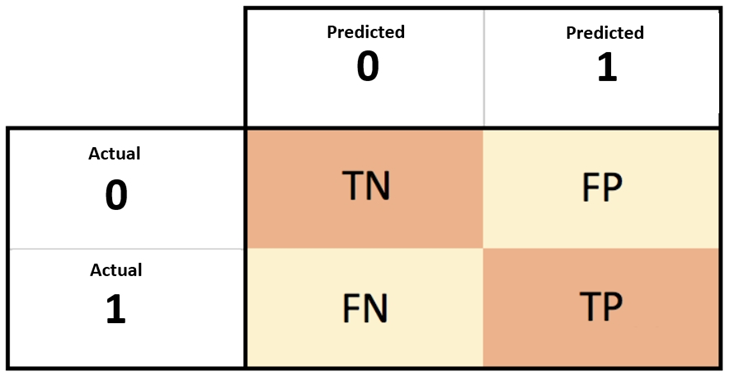

In [ ]:
from sklearn.metrics import confusion_matrix

y_true = np.array([0,1,1,1,1,1,1,1,1,1])
y_pred = np.array([1,0,1,1,1,1,1,1,1,1])

print(f'accuracy: {accuracy_score(y_true, y_pred)}')
print(confusion_matrix(y_true, y_pred))

accuracy: 0.8
[[0 1]
 [1 8]]


In [ ]:
y_true = np.array([1,0,2,0,1,2,0,1,2,0,2,1])
y_pred = np.array([1,0,2,1,2,1,0,1,2,0,1,1])

print(f'accuracy: {accuracy_score(y_true, y_pred)}')
print(confusion_matrix(y_true, y_pred))

accuracy: 0.6666666666666666
[[3 1 0]
 [0 3 1]
 [0 2 2]]


## 다중 클래스 오차 행렬의 TP, FP, FN, TN
* Class A
  * TP:9
  * FP:3 = 1 + 2
  * FN:1 = 1+ 0
  * TN:17 = 8+1+1+7
* Class B
  * TP:8
  * FP:2 = 1+1
  * FN:2 = 1+1
  * TN:18 = 9+0+2+7
* Class C
  * TP:7
  * FP:1 = 1+0
  * FN:3 = 2+1
  * TN:19 = 9+1+1+8

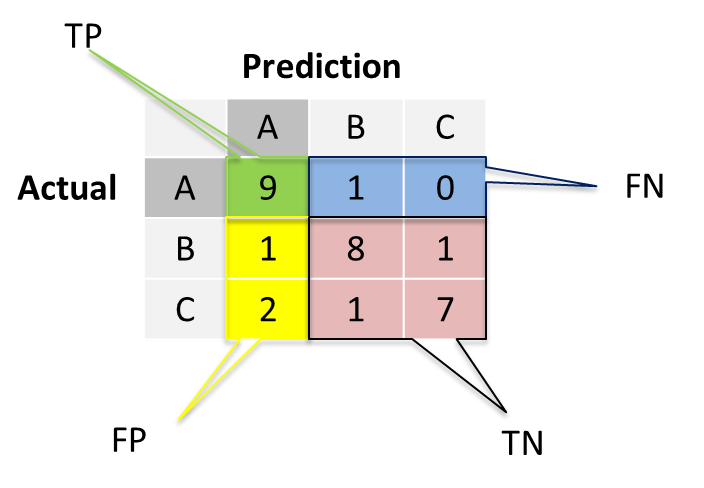


## 정밀도, 재현율

### 정밀도(Precision) = TP / (TP + FP)
* Positive로 예측한 전체 건수 중에 옳게 예측한 건수의 비율
* Positive 예측이 얼마나 정밀한가를 측정하는데 초점을 둔 지표
* 양성 예측도
* 중요 사례
    * 스팸 분류 : 스팸으로 분류한 메일 중에 중요 메일이 있는 경우
* `sklearn.metric.precision_score()`
* 정밀도 사람 탐지 사례
  * thresh=75, 1/1=1
  * thresh=50, 2/2=1
  * thresh=25, 2/3=0.6666
  * thresh=10, 2/4=0.5

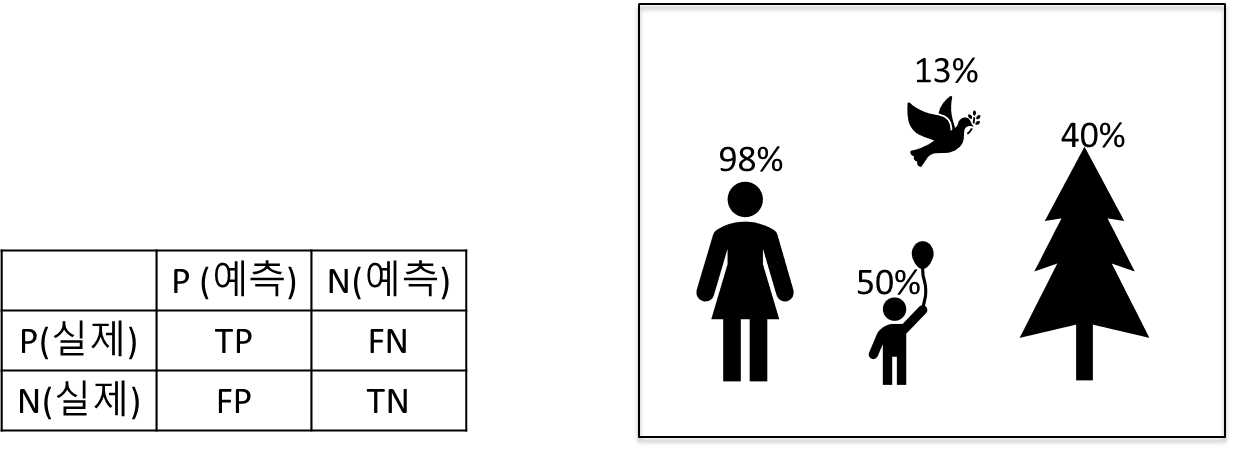

### 재현율(Recall) = TP / (TP + FN)
* 실제 Positive인 건수 중에 Positive로 옳게 예측한 건수의 비율
* TPR(True Positive Rate), 민감도(sensitivity)
* 중요 사례
  * 암 진단 : 암 환자를 건강으로 분류하는 경우
* `sklearn.metrics.recall_score()`
* 재현율 사람 탐지 사례
  * thresh=75, 1/2=0.5
  * thresh=50, 2/2=1
  * thresh=25, 2/2=1
  * thresh=10, 2/2=1

In [ ]:
from sklearn.metrics import precision_score, recall_score

y_true = np.array([0,0,0,0,0,1,1,1,1,1])
y_pred = np.array([0,0,0,0,1,0,1,1,1,1])

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)

print(f'accuracy:{accuracy}, precision:{precision}, recall:{recall}')

accuracy:0.8, precision:0.8, recall:0.8


## F1 스코어
* 정밀도와 재현율은 Trade-off 관계
* 한쪽으로 치우치면 낮아지는 성능
* 재현율과 정밀도의 균형을 나타내는 수치 요구
* Harmonic Mean
  * $F1 = \frac{2}{\frac{1}{recall}+\frac{1}{precision}} = 2\frac{precision\times recall}{precision+recall}$

* `sklearn.metrics.f1_score(y_true, y_pred)`
* `sklearn.metrics.classification_report(y_true, y_pred)`
  * 모든 분류 지표를 한번에 출력


In [1]:
# F1 예 precision:0.5, recall:0.5
2* (0.5*0.5)/(0.5+0.5)

0.5

In [2]:
# F1 예 precision:0.9, recall:0.1
2* (0.9*0.1)/(0.9+0.1)

0.18000000000000002

In [ ]:
from sklearn.metrics import f1_score, classification_report

y_true =  [0,0,0,0,0,0,0,0,1,1]
y_pred1 = [0,0,0,0,0,0,1,1,1,1]
y_pred2 = [0,0,0,0,0,0,0,1,0,1]

for y_pred in [y_pred1, y_pred2]:
    print(confusion_matrix(y_true, y_pred))
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f'accuracy:{accuracy}, precision:{precision},\
                       recall:{recall}, f1: {f1}')
    print(classification_report(y_true, y_pred))

[[6 2]
 [0 2]]
accuracy:0.8, precision:0.5,                       recall:1.0, f1: 0.6666666666666666
              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.50      1.00      0.67         2

    accuracy                           0.80        10
   macro avg       0.75      0.88      0.76        10
weighted avg       0.90      0.80      0.82        10

[[7 1]
 [1 1]]
accuracy:0.8, precision:0.5,                       recall:0.5, f1: 0.5
              precision    recall  f1-score   support

           0       0.88      0.88      0.88         8
           1       0.50      0.50      0.50         2

    accuracy                           0.80        10
   macro avg       0.69      0.69      0.69        10
weighted avg       0.80      0.80      0.80        10



## ROC, AUC
* ROC(Receiver Operation Characteristic) Curve
  * 수신자 판단 곡선
  * FPR(X축) 와 TPR(Y축)의 변화량 곡선
    * TPR(True Positive Rate) : 재현률, TP / (TP + FN)
    * FPR(False Positive Rate) : FP / (TN+ FP)  = 1- TNR
    * TNR(True Negative Rate) : = TN / (TN+ FP)
  * 대각 직선이 가장 낮은 성능, 무작위 확률 성능
    * AUC : 0.5
* AUC(Area Under Curve)
  * ROC 곡선 아래의 면적
  * 1에 가까울 수록 좋다.
* `sklearn.metrics`
  * `fpr, tpr, thresh = roc_curve(y_true, y_pred)`
  * `score = roc_auc_score(y_true, y_pred)`
  * `score = auc(fpr, tpr)`

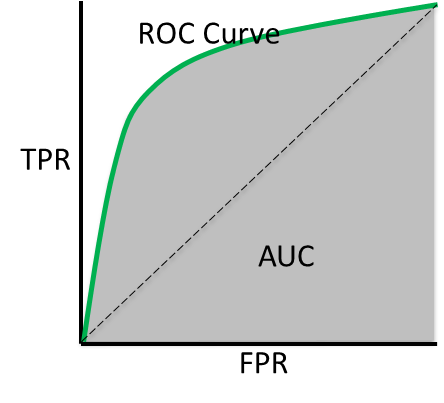

auc score: pred1=0.875, pred2=0.6875
thresh: [2 1 0] [2 1 0]


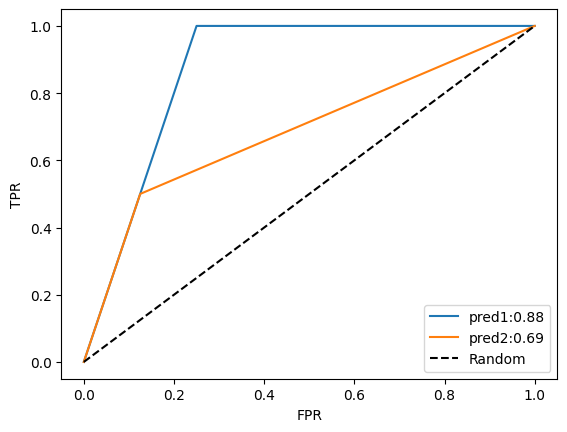

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_true =  [0,0,0,0,0,0,0,0,1,1]
y_pred1 = [0,0,0,0,0,0,1,1,1,1]
y_pred2 = [0,0,0,0,0,0,0,1,0,1]
fprs1, tprs1, thresh1 = roc_curve(y_true, y_pred1)
fprs2, tprs2, thresh2 = roc_curve(y_true, y_pred2)

pred1_auc = roc_auc_score(y_true, y_pred1)
pred2_auc = roc_auc_score(y_true, y_pred2)

plt.xlabel('FPR');plt.ylabel('TPR')
plt.plot(fprs1, tprs1, label=f'pred1:{pred1_auc:.2f}')
plt.plot(fprs2, tprs2, label=f'pred2:{pred2_auc:.2f}')
plt.plot([0,1], [0,1], 'k--', label='Random')
plt.legend()
print(f'auc score: pred1={pred1_auc}, pred2={pred2_auc}')
print('thresh:', thresh1, thresh2)

### 위스콘신 유방암 데이터
* 환자 종양의 특성에 따른 악성/양성 분류
* `load_breast_cancer()`
* 데이터 건수 : 569
* Feature 개수 : 30(세포 특징 10개의 특성 마다 mean, standard error, worst 반복)
  * radius : 반경
  * texture : 질감
  * perimeter : 둘레
  * area : 면적
  * smoothness : 매끄러움(반경 길이의 국소적 변화)
  * compactness : 조그만 정도( (둘레*둘레)/면적 – 1)
  * concavity : 오목함
  * points : 오목한 점의 수
  * symmetry : 대칭
  * fractal dimension : 프랙탈 차원(해안선근사 -1)
* class :  0=Malignant(악성) : 212건, 1=Benign(양성) :357건




In [ ]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(cancer.DESCR)
df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
df['class'] = cancer.target
df.head()

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
df['class'].value_counts()

1    357
0    212
Name: class, dtype: int64

[2 1 0] [0.        0.0754717 1.       ] [0.         0.94444444 1.        ]


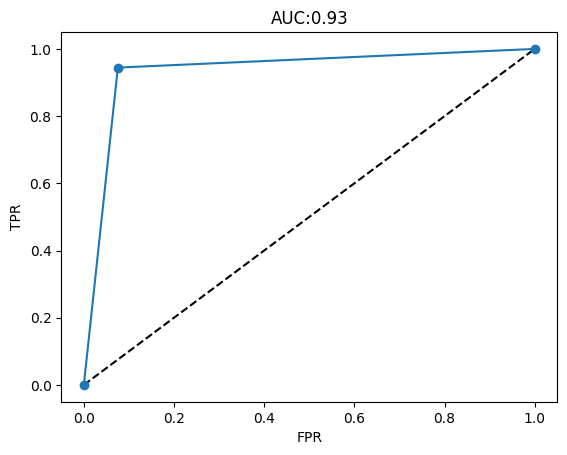

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target,
                                                    random_state=0)
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

fpr, tpr, thresh= roc_curve(y_test, y_pred)
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR'); plt.ylabel('TPR')
plt.title(f'AUC:{roc_auc_score(y_test, y_pred):.2f}')
print(thresh, fpr, tpr)

### 예측 확률로 ROC 실습
* `knn.predict_proba(X_test)`

In [ ]:
y_proba = model.predict_proba(X_test)
print(y_proba.shape)

dist, idx = model.kneighbors(X_test[[10,20]]) # 10,20번째 데이터
print(y_proba[[10,20]], y_pred[[10,20]]) # 10,20 번째 결과
y_train[idx]

(143, 2)
[[0.4 0.6]
 [0.8 0.2]] [1 0]


array([[0, 1, 0, 1, 1],
       [0, 0, 1, 0, 0]])

### Best Threshold
```python
best_idx = np.argmax(tpr - fpr)
best_thresh = thresh[best_idx]
```

thresh [2.  1.  0.8 0.6 0.4 0.2 0. ]
fpr [0.         0.05660377 0.0754717  0.0754717  0.11320755 0.32075472
 1.        ] tpr [0.         0.83333333 0.91111111 0.94444444 0.97777778 1.
 1.        ]
best thresh: 0.6


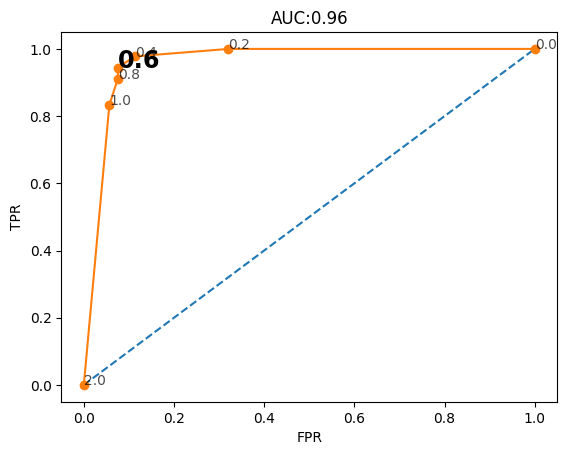

In [ ]:
fpr, tpr, thresh= roc_curve(y_test, y_proba[:, 1])
plt.plot([0,1], [0,1], '--')
plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR'); plt.ylabel('TPR')
plt.title(f'AUC:{roc_auc_score(y_test, y_proba[:, 1]):.2f}')

best_idx = np.argmax(tpr - fpr)
best_thresh = thresh[best_idx]
for i, t in enumerate(thresh):
  if i != best_idx:
    plt.annotate(t, xy=(fpr[i], tpr[i]), alpha=0.7)
plt.annotate(best_thresh, xy=(fpr[best_idx], tpr[best_idx]),
             fontweight='heavy', fontsize='xx-large')
best_thresh = thresh[best_idx]
print('thresh', thresh)
print('fpr', fpr, 'tpr', tpr)
print('best thresh:',best_thresh )

In [ ]:
y_pred2 = y_proba[:, 1] >= best_thresh
np.all(y_pred == y_pred2)

True

In [ ]:
auc1 = roc_auc_score(y_test, y_pred)
auc2 = roc_auc_score(y_test, y_pred2)
auc1, auc2

(0.9344863731656184, 0.9344863731656184)

### Multi-Class ROC

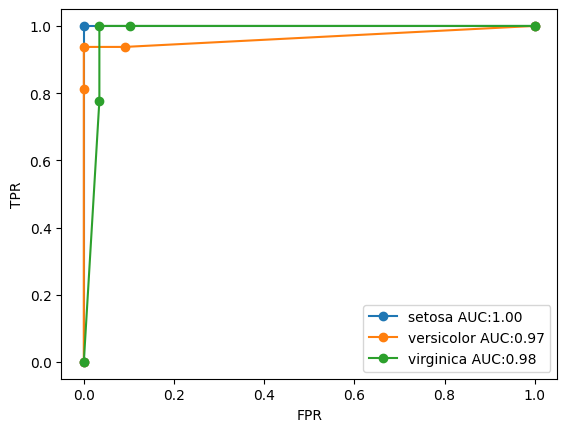

In [ ]:
from sklearn.metrics import auc, roc_curve

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    random_state=0)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_proba = knn.predict_proba(X_test)

plt.xlabel('FPR');plt.ylabel('TPR')
for i, target_name in enumerate(iris.target_names):
  fpr, tpr, thresh = roc_curve(y_test, y_proba[:, i], pos_label=i)
  score = auc(fpr, tpr)
  plt.plot(fpr, tpr, marker='o', label=f'{target_name} AUC:{score:.2f}')
_ = plt.legend()

# Scaling
* 표준화(Standardization), 정규화(Normalization)
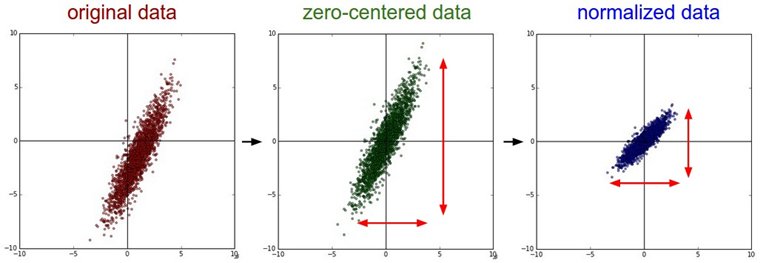

# 표준화(Standardization)
* $𝑥_{𝑛𝑒𝑤}=  \frac{𝑥 −𝜇}{𝜎}  $
* 서로 다른 분포의 특징 값을 동일한 표준 정규 분포로 통일
  * 표준 정규분포 : 평균(𝜇)이 0이고 표준편차(𝜎)가 1인 정규 분포
  * 평균(Mean) : $𝜇= \frac{𝑥_1+ 𝑥_2+ … 𝑥_𝑛}{𝑛}$
    * 각각의 특성(지역성)을 고려하지 않고 전체를 대표(전역성) 하는 하나의 값
  * 분산(Variation) : $𝜎^2= \frac{(𝑥_1−𝜇)^2+(𝑥_2  −𝜇)^2+ …+(𝑥_𝑛−\mu)^2}{𝑛}$
    * 각각의 특징 값이 평균과의 차이에 제곱해서 평균을 낸 값
    * 각각이 특징과 평균과의 차이를 표현
    * 음수 값에 대한 누적은 상쇄 효과가 날 수 있기 때문에 제곱
    * 각 특성 값의 지역적 특성과 전역적 특성의 차이를 나타내는 지표
  *표준편차(Standard Deviation) :   $𝜎= \sqrt{𝜎^2}= \sqrt{\frac{(𝑥_1−𝜇)^2+(𝑥_2  −𝜇)^2+ …+(𝑥_𝑛−\mu)^2)}{𝑛}}$
    * 분산에서 사용한 제곱을 제곱근으로 상쇄

* `sklearn.preprocessing.StandardScaler()`
  * `mean_`, `var_`, `scale_`


## 임의의 수 표준화 실습
* `[2,8,10]`
* 표준화 계산
* StandarsScaler 실습

In [ ]:
arr = np.array([2,8,10], dtype=np.float32).reshape(-1,1)
m, v, s = arr.mean(), arr.var(), arr.std()
print(f'mean:{m}, var:{v}, std:{s}')
print(f'maen:{arr.sum()/3}, var:{np.sum((arr-m)**2)/3}, std:{np.sqrt(v)}')
print((arr-m)/s)

scaler = StandardScaler()
scaler.fit(arr)
print(f'mean:{scaler.mean_}, var:{scaler.var_}, std:{scaler.scale_}')
print(scaler.transform(arr))

mean:6.666666507720947, var:11.555556297302246, std:3.399346351623535
maen:6.666666666666667, var:11.555555979410807, std:3.399346351623535
[[-1.3728129 ]
 [ 0.39223233]
 [ 0.98058075]]
mean:[6.66666667], var:[11.55555556], std:[3.39934634]
[[-1.3728129 ]
 [ 0.39223227]
 [ 0.9805806 ]]


## Iris 데이터 표준화 실습
* iris 0,1 feature 표준화 및 시각화

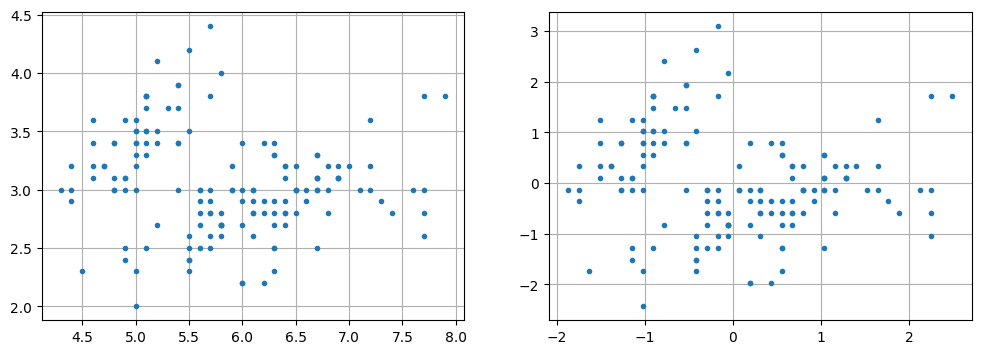

In [ ]:
iris = load_iris()
data = iris.data

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(data[:, 0], data[:, 1], '.')
plt.grid()

scaler = StandardScaler()
scaler.fit(data)
scaled = scaler.transform(data)

plt.subplot(1,2,2)
plt.plot(scaled[:, 0], scaled[:, 1], '.')
plt.grid()

## 표준화의 필요성

* 두 품종의 물고기 길이와 두께 데이터
* 초록색 별표 분류
* `x = np.load('standard.npy')`
* `y = np.concatenate((np.ones(35), np.zeros(14)))`

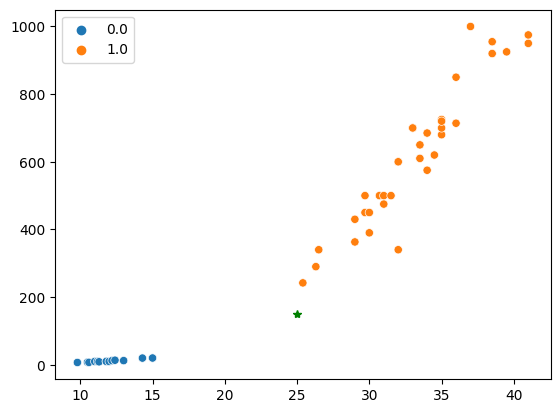

In [ ]:
x = np.array([
       [  25.4,  242. ],
       [  26.3,  290. ],
       [  26.5,  340. ],
       [  29. ,  363. ],
       [  29. ,  430. ],
       [  29.7,  450. ],
       [  29.7,  500. ],
       [  30. ,  390. ],
       [  30. ,  450. ],
       [  30.7,  500. ],
       [  31. ,  475. ],
       [  31. ,  500. ],
       [  31.5,  500. ],
       [  32. ,  340. ],
       [  32. ,  600. ],
       [  32. ,  600. ],
       [  33. ,  700. ],
       [  33. ,  700. ],
       [  33.5,  610. ],
       [  33.5,  650. ],
       [  34. ,  575. ],
       [  34. ,  685. ],
       [  34.5,  620. ],
       [  35. ,  680. ],
       [  35. ,  700. ],
       [  35. ,  725. ],
       [  35. ,  720. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  37. , 1000. ],
       [  38.5,  920. ],
       [  38.5,  955. ],
       [  39.5,  925. ],
       [  41. ,  975. ],
       [  41. ,  950. ],
       [   9.8,    6.7],
       [  10.5,    7.5],
       [  10.6,    7. ],
       [  11. ,    9.7],
       [  11.2,    9.8],
       [  11.3,    8.7],
       [  11.8,   10. ],
       [  11.8,    9.9],
       [  12. ,    9.8],
       [  12.2,   12.2],
       [  12.4,   13.4],
       [  13. ,   12.2],
       [  14.3,   19.7],
       [  15. ,   19.9]])

y = np.concatenate((np.ones(35), np.zeros(14)))
newb = np.array([[25, 150]])

sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y)
plt.plot(newb[0,0], newb[0,1], 'g*')

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x, y)
knn.predict(newb)

array([0.])

[[ 92.00086956 130.48375378 130.73859415 137.17988191 138.32150953]] [[ 0 48 47 45 46]]


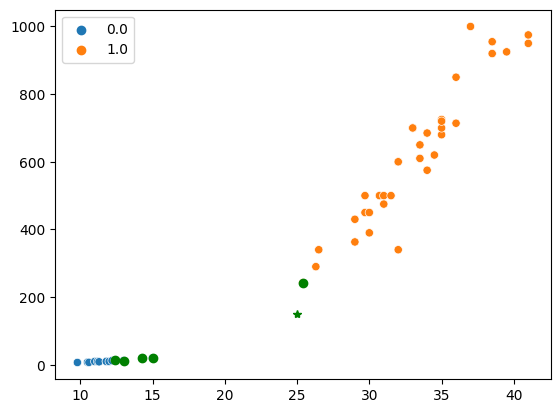

In [ ]:
dist, idx = knn.kneighbors(newb)
print(dist, idx)
sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y)
plt.plot(newb[0,0], newb[0,1], 'g*')
plt.plot(x[idx,0], x[idx,1], 'go');

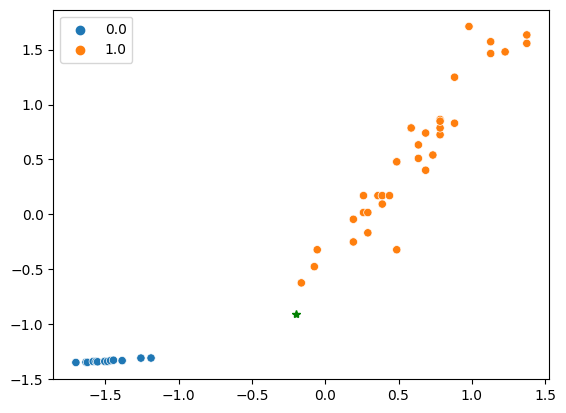

In [ ]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
std.fit(x)
x_t = std.transform(x)

sns.scatterplot(x=x_t[:, 0], y=x_t[:, 1], hue=y)
newb_t = std.transform(newb)
plt.plot(newb_t[0,0], newb_t[0,1], 'g*')

In [ ]:
knn2 = KNeighborsClassifier()
knn2.fit(x_t, y)
knn2.predict(newb_t)

array([1.])

# 정규화(Normalization)
* 서로 다른 규모의 특징 값을 같은 규모(단위)로 통일
* 모든 특징 값을 0 ~ 1 사이로 변환
  * $𝑥_{𝑛𝑒𝑤}=  \frac{𝑥 −min⁡(𝑥)}{max⁡(𝑥)−min⁡(𝑥)} $

* `sklearn.preprocessing.MinMaxScaler(feature_range)`
  * `feature_range = (0,1)`
    * 정규화 목표 구간,   Tuple(min, max)
  * data_min_, data_max_


## MinMaxScaler

* `[2,8,10]`
* min max 정규화 계산
* MinMaxScaler 사용

In [ ]:
from sklearn.preprocessing import MinMaxScaler

arr = np.array([2,8,10], dtype=np.float32).reshape(-1,1)
print(f"before:{arr}")
min, max = arr.min(), arr.max()
print(f'min:{min}, max:{max}')
scaled1 = (arr - min)/(max - min)
print(f"scaled:{scaled1}")

mm_scaler = MinMaxScaler()
mm_scaler.fit(arr)
print(f'min:{mm_scaler.data_min_}, max:{mm_scaler.data_max_}')
scaled2 = mm_scaler.transform(arr)
print(f"scaled:{scaled2}")

before:[[ 2.]
 [ 8.]
 [10.]]
min:2.0, max:10.0
scaled:[[0.  ]
 [0.75]
 [1.  ]]
min:[2.], max:[10.]
scaled:[[0.  ]
 [0.75]
 [1.  ]]


* iris 0,1 feature 정규화 및 시각화

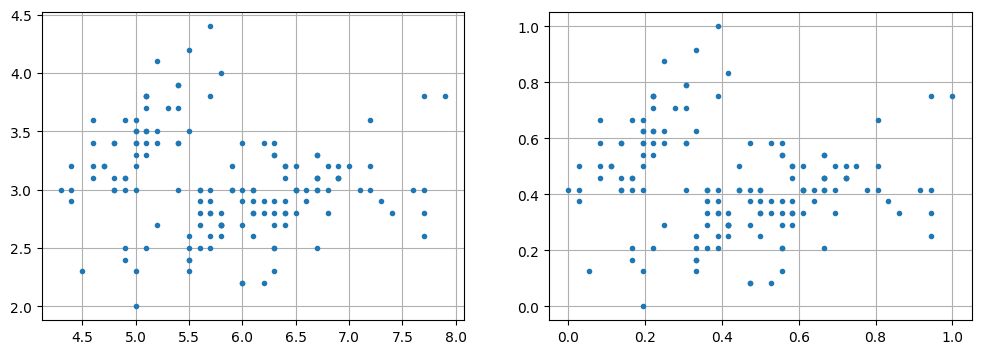

In [ ]:
from sklearn.preprocessing import MinMaxScaler

iris = load_iris()
data = iris.data

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(data[:, 0], data[:, 1], '.')
plt.grid()

mm_scaler = MinMaxScaler()
mm_scaled = mm_scaler.fit_transform(data)
plt.subplot(1,2,2)
plt.plot(mm_scaled[:, 0], mm_scaled[:, 1], '.')
plt.grid()

## Iris 표준화 후 kNN 분류 실습

* iris 데이터 표준화 후 학습 및 평가

In [ ]:
std_scaler = StandardScaler()
X = std_scaler.fit_transform(iris.data)

X_train, X_test, y_train, y_test = train_test_split(X, iris.target, random_state=0)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

score = knn.score(X_test, y_test)
print(f'accuracy:{score}')

accuracy:0.9736842105263158


# Pipeline
* 전처리 단계와 학습 모델을 하나의 객체로 처리
* `sklearn.pipeline.Pipeline(steps, memory, verbose)`
  * `steps` : list of tuple
    * (name, object)
  * `named_steps`



In [ ]:
from sklearn.pipeline import Pipeline

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, random_state=0)

std_scaler = StandardScaler()
knn = KNeighborsClassifier()

pipe = Pipeline([('std_scaler', std_scaler), ('knn', knn)])
pipe.fit(X_train, y_train)
score = pipe.score(X_test, y_test)
print(f'accuracy:{score}')

accuracy:0.9736842105263158


In [ ]:
pipe.steps

[('std_scaler', StandardScaler()),
 ('knn', KNeighborsClassifier(n_neighbors=3))]

In [ ]:
pipe.named_steps

{'std_scaler': StandardScaler(), 'knn': KNeighborsClassifier(n_neighbors=3)}

In [ ]:
pipe[1], pipe['knn']

(KNeighborsClassifier(n_neighbors=3), KNeighborsClassifier(n_neighbors=3))

In [ ]:
pipe.set_params(knn__n_neighbors=1)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=1))])

# 손글씨 숫자 분류
* 사람 손으로 쓴 숫자(0~9)
* 전체 샘플 건수 : 1,797
* 각 이미지 크기 : 8 x 8,  각 픽셀 값 범위 : 0~16

shape: (1797, 64) min: 0.0 max: 16.0
first digits : 0


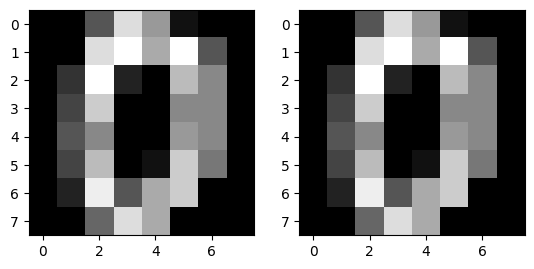

In [ ]:
digits = load_digits()
print('shape:', digits.data.shape,'min:', np.min(digits.data), 'max:', np.max(digits.data))
print("first digits :", digits.target[0])
plt.subplot(121)
plt.imshow(digits.images[0], cmap='gray')
plt.subplot(122)
plt.imshow(digits.data[0].reshape((8,8)), cmap='gray')
plt.show()

In [ ]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo


* 첫 번째 숫자만 **표시**

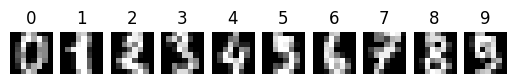

In [ ]:
for i in digits.target_names:
    dimg = digits.images[digits.target==i][0]
    plt.subplot(1,10,i+1)
    plt.imshow(dimg, cmap='gray')
    plt.title(i)
    plt.axis('off')
plt.show()


* 최대최소 정규화 적용
* 훈련 세트와 테스트 세트 분류
* `n_neighbors`를 1~11로 변경하면서 학습 및 평가

In [ ]:
mm = MinMaxScaler()
X = mm.fit_transform(digits.data)
X_train, X_test, y_train, y_test = train_test_split(X, digits.target,
                                                    random_state=0)

for k in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)

    score = model.score(X_test, y_test)
    print("k=%2d, accuracy=%.2f%%"%(k, score*100))

k= 1, accuracy=99.11%
k= 2, accuracy=98.67%
k= 3, accuracy=98.89%
k= 4, accuracy=98.00%
k= 5, accuracy=98.22%
k= 6, accuracy=97.56%
k= 7, accuracy=98.00%
k= 8, accuracy=97.78%
k= 9, accuracy=97.78%
k=10, accuracy=97.78%


# 교차 검증(Cross Validation)
* 무작위로 뒤섞은 Train, Test Set은 실행 할 때 마다 다른 평가 결과를 가져온다.
* Train Set과 Test Set의 역할을 바꾸어 모든 Data Set에 역할을 교차 수행
* Total Data Set = Train + Validation + Test
* 여러 세트로 구성된 학습 데이터 세트와 검증 세트로 학습과 평가 수행
* 과적합 방지, 파라미터 튜닝


## KFold
* 가장 보편적인 교차 검증 기법
* k개의 데이터 폴드 세트 생성
* k 번 만큼 각 폴드 세트 검증 평가 반복
* `sklearn.model_selection.KFold(n_splits, shuffle, random_state)`
  * `n_splits=5` : 폴드의 갯수, 최소 2이상
  * `shuffle=False` : 폴드 나누기 전 뒤섞기 여부
  * `random_state=None` : shuffle=True 인 경우 random seed
* `split(X [,y, groups])` : 폴드에 포함할 index 반환



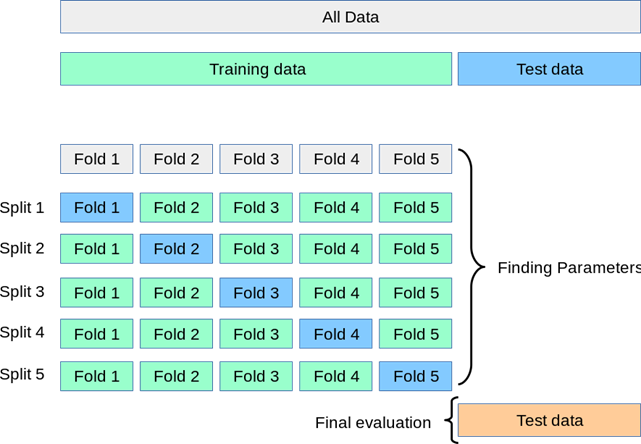


* `np.arange(0.0, 1.5, 0.1)`를 `KFold(3)`으로 분할

In [ ]:
from sklearn.model_selection import KFold

x = np.arange(0.0, 1.5, 0.1)
kfold = KFold(3)
for train, test in kfold.split(x):
  print('index:',train, test)
  print('values:',x[train], x[test])

index: [ 5  6  7  8  9 10 11 12 13 14] [0 1 2 3 4]
values: [0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4] [0.  0.1 0.2 0.3 0.4]
index: [ 0  1  2  3  4 10 11 12 13 14] [5 6 7 8 9]
values: [0.  0.1 0.2 0.3 0.4 1.  1.1 1.2 1.3 1.4] [0.5 0.6 0.7 0.8 0.9]
index: [0 1 2 3 4 5 6 7 8 9] [10 11 12 13 14]
values: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9] [1.  1.1 1.2 1.3 1.4]


* Imbalanced Data Set KFold 실습
  * y의 값의 균형이 0:10개, 1:5개
  * shuffle 을 해도 Train, Test 간의 불 균형


In [ ]:
x = np.arange(0.0, 1.5, 0.1)
y = np.zeros(15)
y[10:] = 1

kfold = KFold(3, shuffle=True)
for train, test in kfold.split(x):
  print(y[train], y[test])

[0. 0. 0. 0. 0. 0. 0. 1. 1. 1.] [0. 0. 0. 1. 1.]
[0. 0. 0. 0. 0. 0. 1. 1. 1. 1.] [0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 1. 1. 1.] [0. 0. 0. 1. 1.]


##  Stratified K-Fold
  * 불균형한 분포를 갖는 레이블 *데이터*
* `sklearn.model_selection.StratifiedKFold(n_splits, shuffle, random_state)`
  * imbalanced data set의 폴드를 균형있게 분할



In [ ]:
from sklearn.model_selection import StratifiedKFold

x = np.arange(0.0, 1.5, 0.1)
y = np.zeros(15)
y[10:] = 1

skfold = StratifiedKFold(n_splits=5, shuffle=True)
for train, test in skfold.split(x, y):
  print(y[train], y[test])

[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.] [0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.] [0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.] [0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.] [0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.] [0. 0. 1.]


## Cross Validation 실습
* 손글씨 data KFold(5)로 kNN 학습 및 평가

In [ ]:
digits = load_digits()
kfold = KFold(n_splits=5)

knn = KNeighborsClassifier(n_neighbors=1)
cv_acc = np.array([])

for i, (train_idx, test_idx) in enumerate(kfold.split(digits.data)):
  X_train, X_test = digits.data[train_idx], digits.data[test_idx]
  y_train, y_test = digits.target[train_idx], digits.target[test_idx]
  knn.fit(X_train, y_train)
  pred = knn.predict(X_test)

  acc = accuracy_score(y_test, pred)
  cv_acc = np.append(cv_acc, acc)
print(f'acc scores:{cv_acc}')
print(f'mean acc:{cv_acc.mean()}')


acc scores:[0.96111111 0.95277778 0.96657382 0.98885794 0.95543175]
mean acc:0.9649504797276384


### cross_val_score
* `sklearn.model_selection`
  * `cross_val_score(estimator, X, y, groups, scoring, cv=5, ...)`
    * scoring:  https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    * KFold 수행 결과를 점수로 반환하는 함수
  * cross_validate(estimator, X, y, groups, scoring, cv=5, ...)
    * 여러 평가지표를 한꺼번에 출력


In [ ]:
from sklearn.model_selection import cross_val_score, cross_validate

knn = KNeighborsClassifier(n_neighbors=1)

scores = cross_val_score(knn, digits.data, digits.target, cv=5)
print(f'acc scores :{scores}')
print(f'mean acc : {scores.mean()}')

acc scores :[0.96111111 0.95277778 0.96657382 0.98607242 0.95543175]
mean acc : 0.9643933766635715


In [ ]:
cross_validate(knn, digits.data, digits.target, cv=5)

{'fit_time': array([0.00726652, 0.00109911, 0.00153565, 0.00154829, 0.0013628 ]),
 'score_time': array([0.02094722, 0.02423406, 0.1634593 , 0.17453361, 0.17165327]),
 'test_score': array([0.96111111, 0.95277778, 0.96657382, 0.98607242, 0.95543175])}

# 최적의 파라미터 찾기
* `n_neighbors` 값을 바꾸어 가며 `cross_val_score()`를 여러 번 실행
  * `n_neighbors` = 1~11
  * cross validation = 5
* 가장 좋은 성능을 나타내는 파라미터 값 찾기


In [ ]:
best = (0,0)
for k in range(1, 11):
  knn = KNeighborsClassifier(n_neighbors=k)
  scores = cross_val_score(knn, digits.data, digits.target, cv=5)
  print(f'k={k}, mean acc:{scores.mean()}, acc scores :{scores}')
  if best[1] < scores.mean():
    best = k, scores.mean()

print(f'best, k:{best[0]}, mean acc:{best[1]}')

k=1, mean acc:0.9643933766635715, acc scores :[0.96111111 0.95277778 0.96657382 0.98607242 0.95543175]
k=2, mean acc:0.9671711544413494, acc scores :[0.96111111 0.96666667 0.96935933 0.97771588 0.96100279]
k=3, mean acc:0.966621788919839, acc scores :[0.95555556 0.95833333 0.96657382 0.98607242 0.96657382]
k=4, mean acc:0.9638409161250386, acc scores :[0.94722222 0.95833333 0.96657382 0.98050139 0.96657382]
k=5, mean acc:0.9627282575054161, acc scores :[0.94722222 0.95555556 0.96657382 0.98050139 0.9637883 ]
k=6, mean acc:0.9593856391210152, acc scores :[0.94444444 0.95833333 0.96657382 0.97493036 0.95264624]
k=7, mean acc:0.9599458372021046, acc scores :[0.93611111 0.96111111 0.96935933 0.98050139 0.95264624]
k=8, mean acc:0.9577205199628598, acc scores :[0.93611111 0.95555556 0.96935933 0.97771588 0.94986072]
k=9, mean acc:0.9566109563602601, acc scores :[0.93055556 0.95277778 0.97214485 0.97771588 0.94986072]
k=10, mean acc:0.954942742185082, acc scores :[0.93055556 0.94722222 0.969

## GridSearchCV
* 최적의 파라미터 튜닝
* `obj = sklearn.model_selection.GridSearchCV(estimator, param_grid, cv, ...)`
  * `estimator` : estimator object
  * `param_grid` : dict
    * `estimator` 튜닝을 위해 시도할 파라미터 이름과 값
  * `cv` : cross validation에 사용할 Fold 수, 또는 KFold 객체
* `obj.cv_results_` : GridSearch 결과
  * 출력이 복잡하므로 Pandas DataFrame 활용
* `obj.best_params_` : 최적의 파라미터
* `obj.best_estimator_` : 최적의 파라미터로 학습된 모델


* GridSearchCV, knn으로 최적의 n_neighbors 찾기

In [ ]:
from sklearn.model_selection import GridSearchCV

digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)

knn = KNeighborsClassifier()
gcv = GridSearchCV(estimator=knn, param_grid={'n_neighbors':range(1, 11)}, cv=5)
gcv.fit(X_train, y_train)
display(pd.DataFrame(gcv.cv_results_))
print("best param:", gcv.best_params_)

test_acc = gcv.score(X_test, y_test)
estimator = gcv.best_estimator_
print('Test acc:', test_acc, estimator.score(X_test, y_test))

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001355,0.000103,0.015608,0.003833,1,{'n_neighbors': 1},0.970370,0.985185,0.988848,0.988848,0.988848,0.984420,0.007166,3
1,0.002136,0.001693,0.032674,0.022841,2,{'n_neighbors': 2},0.970370,0.977778,0.985130,0.985130,0.977695,0.979221,0.005524,9
2,0.001294,0.000132,0.038975,0.027660,3,{'n_neighbors': 3},0.985185,0.988889,0.985130,0.985130,0.985130,0.985893,0.001498,1
3,0.001394,0.000088,0.066414,0.065750,4,{'n_neighbors': 4},0.981481,0.996296,0.977695,0.981413,0.981413,0.983660,0.006482,4
4,0.001420,0.000121,0.054591,0.063636,5,{'n_neighbors': 5},0.988889,0.996296,0.973978,0.985130,0.985130,0.985885,0.007216,2
5,0.001374,0.000145,0.130920,0.072328,6,{'n_neighbors': 6},0.977778,0.988889,0.973978,0.981413,0.985130,0.981437,0.005257,6
6,0.006943,0.005551,0.178126,0.083759,7,{'n_neighbors': 7},0.977778,0.988889,0.973978,0.985130,0.988848,0.982924,0.006034,5
7,0.006150,0.005829,0.201830,0.137243,8,{'n_neighbors': 8},0.977778,0.988889,0.973978,0.985130,0.981413,0.981437,0.005257,6
8,0.002970,0.002843,0.186673,0.050633,9,{'n_neighbors': 9},0.974074,0.985185,0.973978,0.981413,0.985130,0.979956,0.005031,8
9,0.001460,0.000045,0.150109,0.049770,10,{'n_neighbors': 10},0.977778,0.981481,0.973978,0.977695,0.985130,0.979212,0.003793,10


best param: {'n_neighbors': 3}
Test acc: 0.9866666666666667 0.9866666666666667


## Pipeline + GridSearch
* Minmax Scaler 적용
* `param_grid` prefix : name__


In [ ]:
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
mm_scaler = MinMaxScaler()
knn = KNeighborsClassifier()
pipe = Pipeline([('mm_scaler', mm_scaler), ('knn', knn)])

gcv = GridSearchCV(estimator=pipe, param_grid={'knn__n_neighbors':range(1, 11)}, cv=5)
gcv.fit(X_train, y_train)
display(pd.DataFrame(gcv.cv_results_))

print("best param:", gcv.best_params_)

estimator = gcv.best_estimator_
test_acc = estimator.score(X_test, y_test)
print('Test acc:', test_acc)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004518,0.002076,0.060671,0.023171,1,{'knn__n_neighbors': 1},0.974074,0.985185,0.988848,0.988848,0.985130,0.984417,0.005428,3
1,0.005953,0.003234,0.116299,0.080770,2,{'knn__n_neighbors': 2},0.977778,0.977778,0.985130,0.985130,0.977695,0.980702,0.003616,7
2,0.003067,0.000286,0.090296,0.063200,3,{'knn__n_neighbors': 3},0.985185,0.988889,0.985130,0.985130,0.981413,0.985149,0.002364,1
3,0.003180,0.000611,0.058507,0.054437,4,{'knn__n_neighbors': 4},0.981481,0.992593,0.977695,0.981413,0.977695,0.982175,0.005472,5
4,0.002670,0.000194,0.014780,0.001843,5,{'knn__n_neighbors': 5},0.988889,0.992593,0.973978,0.985130,0.985130,0.985144,0.006232,2
5,0.003001,0.000644,0.067776,0.047126,6,{'knn__n_neighbors': 6},0.977778,0.985185,0.973978,0.981413,0.981413,0.979953,0.003797,10
6,0.003865,0.003034,0.027115,0.021793,7,{'knn__n_neighbors': 7},0.977778,0.988889,0.973978,0.985130,0.985130,0.982181,0.005460,4
7,0.005817,0.005421,0.088022,0.055873,8,{'knn__n_neighbors': 8},0.974074,0.988889,0.973978,0.985130,0.981413,0.980697,0.005938,8
8,0.003760,0.002663,0.019615,0.011282,9,{'knn__n_neighbors': 9},0.974074,0.988889,0.970260,0.981413,0.985130,0.979953,0.006889,9
9,0.002036,0.000097,0.011972,0.000140,10,{'knn__n_neighbors': 10},0.977778,0.988889,0.973978,0.981413,0.985130,0.981437,0.005257,6


best param: {'knn__n_neighbors': 3}
Test acc: 0.9888888888888889


In [ ]:
estimator

Pipeline(steps=[('mm_scaler', MinMaxScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

# RandomSearch
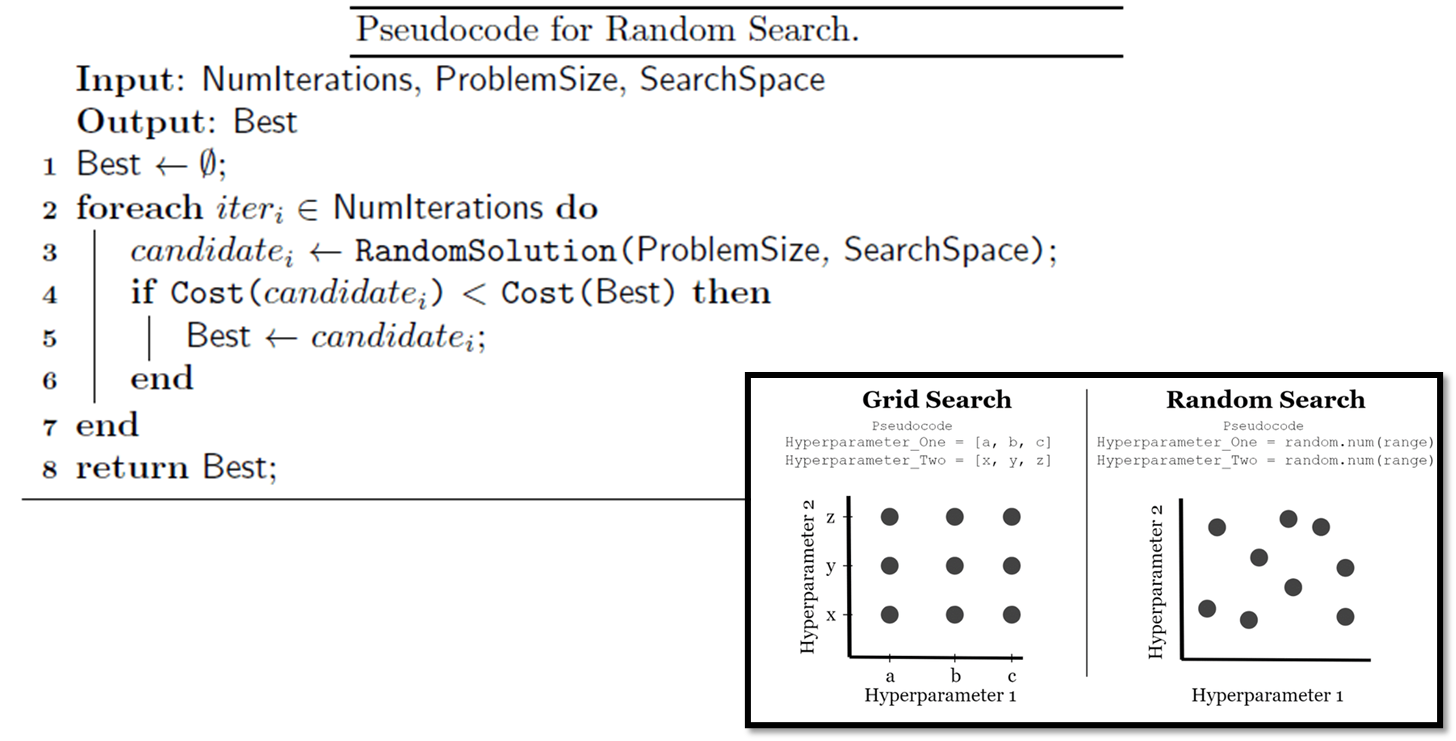

## RandomSearchCV
* `obj = sklearn.model_selection.RandomizedSearchCV()`
  * `estimator`
  * `param_distributions`
  * `n_iter`
  * `cv`
* `obj.cv_results_` : GridSearch 결과
  * 출력이 복잡하므로 Pandas DataFrame 활용
* `obj.best_params_` : 최적의 파라미터
* `obj.best_estimator_` : 최적의 파라미터로 학습된 모델


* RandomizeSearchCV + Pipe
  * kNN 숫자 손글씨 분류

In [ ]:
digits = load_digits()
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, random_state=0)
mm_scaler = MinMaxScaler()
knn = KNeighborsClassifier()
pipe = Pipeline([('mm_scaler', mm_scaler), ('knn', knn)])

rcv = RandomizedSearchCV(pipe, {'knn__n_neighbors':range(1, 21)}, cv=5, random_state=0)
rcv.fit(X_train, y_train)
display(pd.DataFrame(rcv.cv_results_))

print("best param:", rcv.best_params_)

estimator = rcv.best_estimator_
test_acc = estimator.score(X_test, y_test)
print('Test acc:', test_acc)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003109,0.000273,0.038664,0.024148,19,{'knn__n_neighbors': 19},0.962963,0.970370,0.966543,0.966543,0.973978,0.968079,0.003767,9
1,0.007959,0.005861,0.078663,0.046302,2,{'knn__n_neighbors': 2},0.977778,0.977778,0.985130,0.985130,0.977695,0.980702,0.003616,4
2,0.007832,0.006147,0.090279,0.064264,20,{'knn__n_neighbors': 20},0.959259,0.970370,0.962825,0.970260,0.973978,0.967339,0.005430,10
3,0.006010,0.005897,0.092082,0.069701,9,{'knn__n_neighbors': 9},0.974074,0.988889,0.970260,0.981413,0.985130,0.979953,0.006889,5
4,0.004418,0.002195,0.027704,0.012625,11,{'knn__n_neighbors': 11},0.981481,0.977778,0.973978,0.977695,0.981413,0.978469,0.002792,6
5,0.005048,0.002565,0.065505,0.067317,18,{'knn__n_neighbors': 18},0.966667,0.970370,0.962825,0.966543,0.977695,0.968820,0.005038,8
6,0.003728,0.001158,0.034025,0.030545,7,{'knn__n_neighbors': 7},0.977778,0.988889,0.973978,0.985130,0.985130,0.982181,0.005460,3
7,0.003126,0.000307,0.050321,0.059321,14,{'knn__n_neighbors': 14},0.974074,0.974074,0.970260,0.973978,0.977695,0.974016,0.002352,7
8,0.006646,0.007114,0.046276,0.039417,5,{'knn__n_neighbors': 5},0.988889,0.992593,0.973978,0.985130,0.985130,0.985144,0.006232,2
9,0.004107,0.002325,0.070816,0.075839,3,{'knn__n_neighbors': 3},0.985185,0.988889,0.985130,0.985130,0.981413,0.985149,0.002364,1


best param: {'knn__n_neighbors': 3}
Test acc: 0.9888888888888889


In [ ]:
estimator

Pipeline(steps=[('mm_scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())])

# 모델 저장 및 복원

* 최적의 모델 저장
 *  `model.dat`

In [ ]:
import pickle

with open('model', 'wb') as f:
  pickle.dump(estimator, f)


In [ ]:
with open('model', 'rb') as f:
  model = pickle.load(f)

model.score(X_test, y_test)

0.9888888888888889

### 손으로 쓴 숫자 인식하기
* 온라인 그림판 : https://sketch.io/sketchpad/
* 샘플 숫자 이미지 다운로드 :  0458.png

In [ ]:
# 강사가 파일을 제공한 경우 실행하지 마세요.
from urllib import request

url = 'https://raw.githubusercontent.com/dltpdn/img2data/master/0458.png'

with request.urlopen(url) as r:
    with open('number.png', 'wb') as f:
      f.write(r.read())

*  img2data 모듈 설치

In [ ]:
!pip install img2data 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


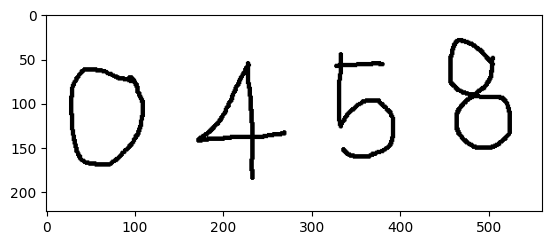

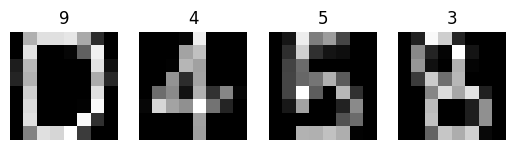

In [ ]:
import img2data
import cv2

image = cv2.imread('number.png')
plt.imshow(image)
plt.show()

numbers = img2data.img2digits(image, (8,8), reshape=True)
for i, n in enumerate(numbers):
    n = n/n.max() * 16 # 0~255 구간을 0~16구간으로 변경
    y_pred = model.predict(n)

    plt.subplot(1, len(numbers), i+1)
    plt.title(y_pred[0])
    plt.imshow(n.reshape(8,8), cmap="gray")
    plt.axis("off")

# 알고리즘 선택
https://scikit-learn.org/stable/tutorial/machine_learning_map/
![](https://scikit-learn.org/stable/_static/ml_map.png)